In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
operating_budget = pd.read_csv('/content/drive/My Drive/CS 506/FinalProject/FY25-Operating.csv')
capital_budget = pd.read_csv('/content/drive/My Drive/CS 506/FinalProject/FY25-Capital.csv')

In [ ]:
operating_budget.head()

,_id,Cabinet,Dept,Program,Expense Category,FY22 Actual Expense,FY23 Actual Expense,FY24 Appropriation,FY25 Budget
0,1,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Personnel Services,1624903.69,2374448.36,1921403.81,2217748.39
1,2,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Contractual Services,284597.9,383743.11,219633.42,234628
2,3,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Supplies & Materials,28541.55,74491.63,55573.65,60000
3,4,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Current Charges & Obligations,19410.3,25350.83,16734.29,20000
4,5,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Equipment,16164.36,44132.61,36115,53000


In [ ]:
budget_columns = ["FY22 Actual Expense", "FY23 Actual Expense", "FY24 Appropriation", "FY25 Budget"]
operating_budget[budget_columns] = operating_budget[budget_columns].replace({"#Missing": 0}).fillna(0)
operating_budget[budget_columns] = operating_budget[budget_columns].apply(pd.to_numeric)

In [ ]:
operating_budget.head(5)


,_id,Cabinet,Dept,Program,Expense Category,FY22 Actual Expense,FY23 Actual Expense,FY24 Appropriation,FY25 Budget
0,1,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Personnel Services,1624903.69,2374448.36,1921403.81,2217748.39
1,2,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Contractual Services,284597.90,383743.11,219633.42,234628.00
2,3,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Supplies & Materials,28541.55,74491.63,55573.65,60000.00
3,4,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Current Charges & Obligations,19410.30,25350.83,16734.29,20000.00
4,5,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Equipment,16164.36,44132.61,36115.00,53000.00


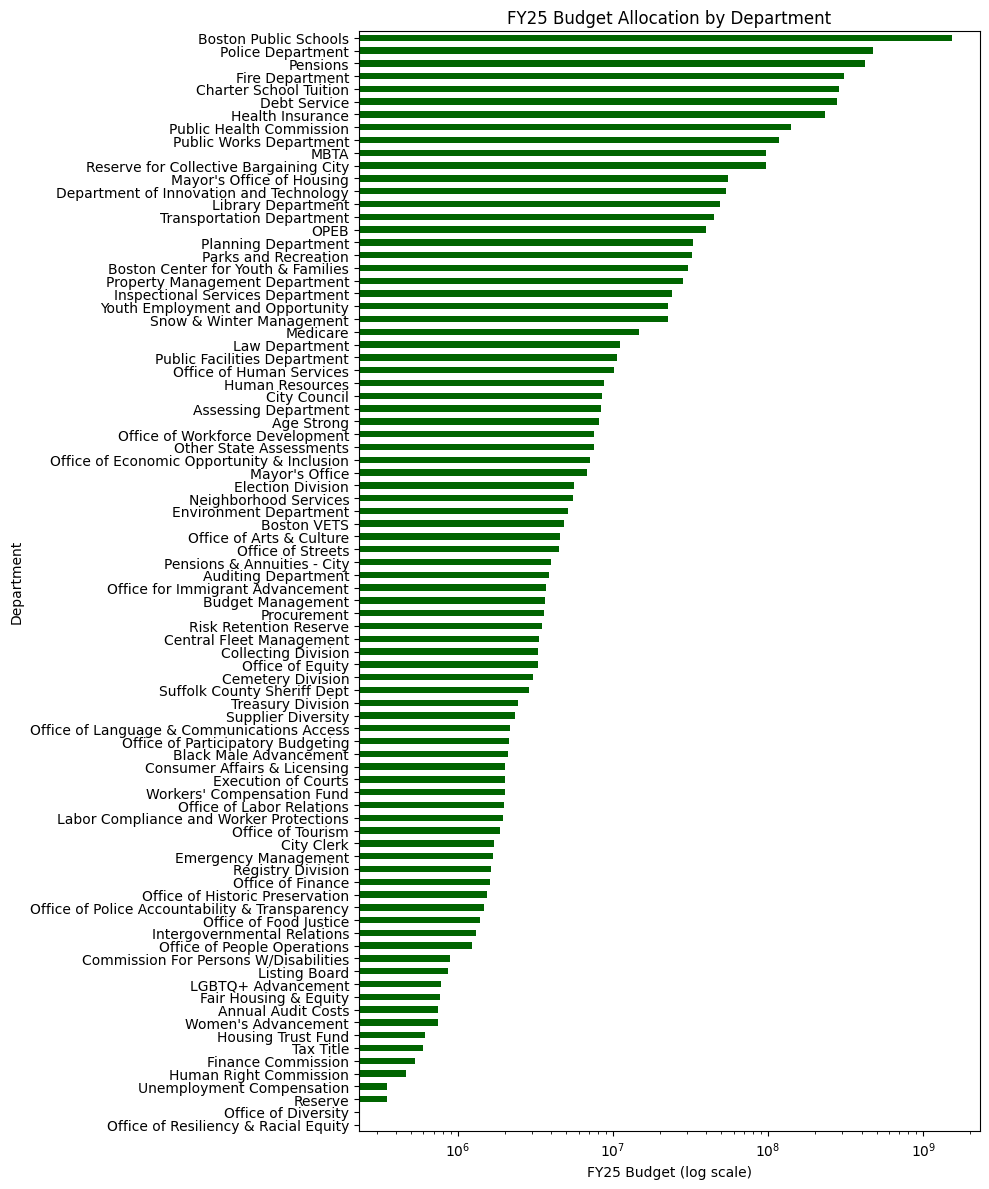

In [ ]:
# Summing the FY25 budget for each department
dept_budget_sums = operating_budget.groupby("Dept")["FY25 Budget"].sum()

# Sorting departments by budget allocation
dept_budget_sums_sorted = dept_budget_sums.sort_values(ascending=True)

# Plotting with a horizontal bar chart and log scale on x-axis
plt.figure(figsize=(10, 12))
dept_budget_sums_sorted.plot(kind='barh', color="darkgreen", logx=True)
plt.title("FY25 Budget Allocation by Department")
plt.xlabel("FY25 Budget (log scale)")
plt.ylabel("Department")
plt.tight_layout()
plt.show()

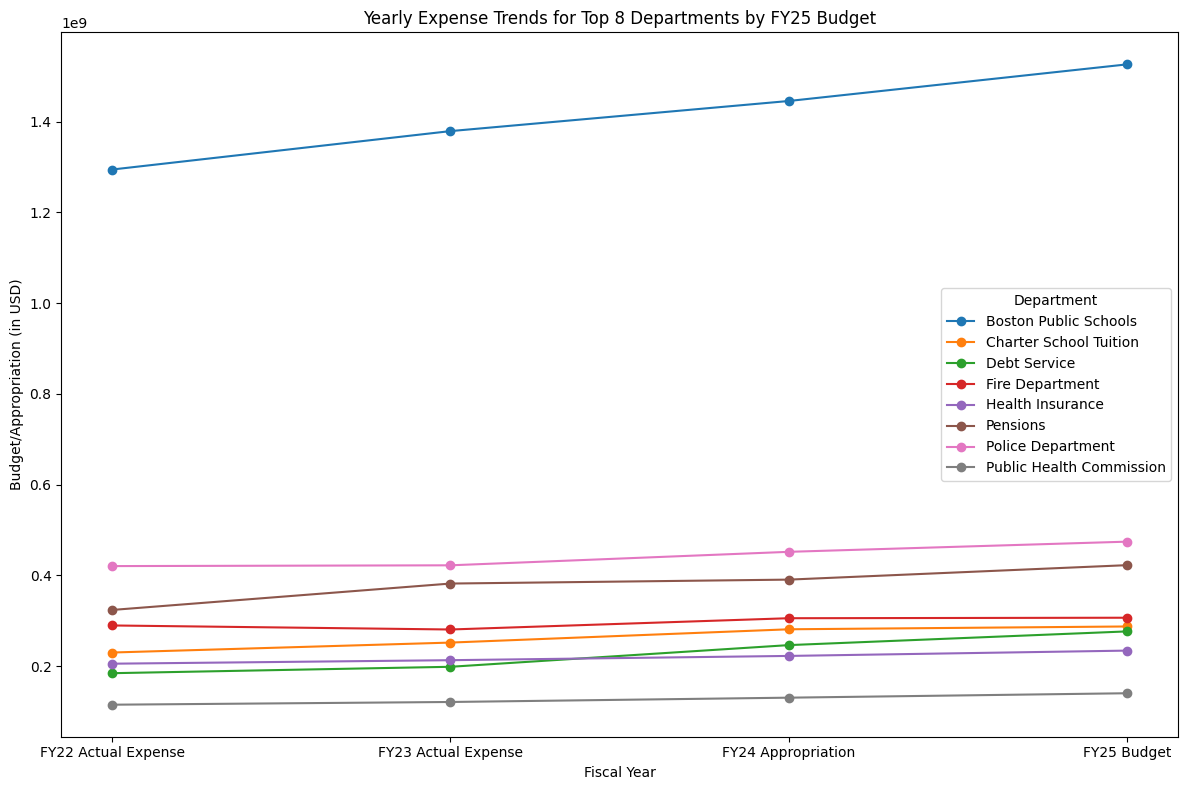

In [ ]:
# Visualization 2: Yearly Expense Trends for Selected Departments
# Selecting top 8 departments with the highest FY25 Budget for clearer visualization
top_departments = operating_budget.groupby("Dept")["FY25 Budget"].sum().nlargest(8).index
yearly_expenses = operating_budget[operating_budget["Dept"].isin(top_departments)].groupby("Dept")[budget_columns].sum()

plt.figure(figsize=(12, 8))
for dept in yearly_expenses.index:
    plt.plot(yearly_expenses.columns, yearly_expenses.loc[dept], marker='o', label=dept)

plt.title("Yearly Expense Trends for Top 8 Departments by FY25 Budget")
plt.xlabel("Fiscal Year")
plt.ylabel("Budget/Appropriation (in USD)")
plt.legend(title="Department")
plt.tight_layout()
plt.show()

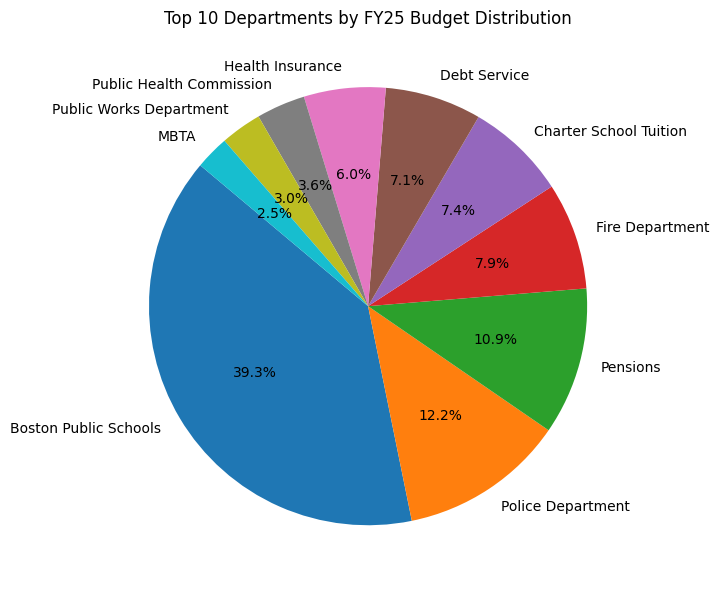

In [ ]:
# Visualization 3: Department-Level Budget Distribution
dept_budget_distribution = operating_budget.groupby("Dept")["FY25 Budget"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
dept_budget_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("Top 10 Departments by FY25 Budget Distribution")
plt.ylabel("")
plt.tight_layout()
plt.show()

In [ ]:
capital_budget.head()

,_id,Department,Project_Name,Scope_Of_Work,PM_Department,Project_Status,Neighborhood,Authorization_Existing,Authorization_FY,Authorization_Future,...,GO_Expended,Capital_Year_0,CapitalYear_1,Capital_Year_25,Grant_Expended,Grant_Year_0,Grant_Year_1,GrantYear_25,External_Funds,Total_Project_Budget
0,1,Boston Centers for Youth and Families,BCYF Security and Technology Upgrades,Improvements to technology infrastructure and ...,Boston Centers for Youth and Families,To Be Scheduled,Citywide,2000000,0,0,...,0.0,0,0,2000000.0,0.0,0,0,0.0,0,2000000
1,2,Boston Centers for Youth and Families,BCYF Tobin Community Center Retaining Wall,Repair or replace the retaining wall adjacent ...,Public Facilities Department,In Design,Mission Hill,1800000,0,0,...,84629.0,139188,400000,1176183.0,0.0,0,0,0.0,0,1800000
2,3,Boston Centers for Youth and Families,BCYF North End Community Center,Design and construct a new North End Community...,Public Facilities Department,In Design,North End,68000000,0,0,...,9500.0,1000000,2000000,64990500.0,0.0,0,0,0.0,20000000,88000000
3,4,Boston Centers for Youth and Families,Pool Repairs,Renovate and upgrade locker rooms and pools in...,Boston Centers for Youth and Families,Annual Program,Citywide,2300000,2700000,0,...,886590.0,500000,1000000,2613410.0,0.0,0,0,0.0,0,5000000
4,5,Boston Centers for Youth and Families,Youth Budget Round 4,Engage youth across the City using participato...,Youth Engagement and Advancement,Implementation Underway,Citywide,1000000,0,0,...,28500.0,13815,0,957685.0,0.0,0,0,0.0,0,1000000


In [ ]:
# Define the population data as per your specifications, combining Allston and Brighton, and Fenway and Longwood
population_data = {
    "Neighborhood": [
        "Citywide", "Allston/Brighton", "Back Bay", "Beacon Hill", "Charlestown",
        "Chinatown", "Dorchester", "Downtown/Government Center", "East Boston", "Fenway-Kenmore",
        "Hyde Park", "Jamaica Plain", "Mattapan", "Mission Hill",
        "North End", "Roslindale", "Roxbury", "South Boston",
        "South Boston Waterfront", "South End", "West End", "West Roxbury"
    ],
    "Population": [
        675647, 76951, 18190, 9336, 19120, 6211, 122191, 13768, 43066,
        42679,  # Combined Fenway (37493) + Longwood (5186)
        34172, 40015, 23840, 17518, 10805, 29586, 54533, 37917,
        5579, 30904, 7705, 31561
    ]
}

# Convert the dictionary to a DataFrame
population_df = pd.DataFrame(population_data)

# Display the updated DataFrame
population_df.sort_values(by="Population", ascending = False)

,Neighborhood,Population
0,Citywide,675647
6,Dorchester,122191
1,Allston/Brighton,76951
16,Roxbury,54533
8,East Boston,43066
9,Fenway-Kenmore,42679
11,Jamaica Plain,40015
17,South Boston,37917
10,Hyde Park,34172
21,West Roxbury,31561


In [ ]:
# Aggregating the total project budget by neighborhood in the capital budget dataset
neighborhood_budget = capital_budget.groupby("Neighborhood")["Total_Project_Budget"].sum().reset_index()

# Merging the capital budget allocation with the updated population data
merged_df = pd.merge(neighborhood_budget, population_df, on="Neighborhood", how="left")

# Calculating budget per capita (project allocation divided by population) for comparison
merged_df["Budget_Per_Capita"] = merged_df["Total_Project_Budget"] / merged_df["Population"]

# Sorting by Budget_Per_Capita for analysis and displaying the result
merged_df_sorted = merged_df.sort_values(by="Budget_Per_Capita", ascending=False)

# Display the merged DataFrame with Total Project Budget, Population, and Budget Per Capita for each neighborhood
merged_df_sorted

,Neighborhood,Total_Project_Budget,Population,Budget_Per_Capita
5,Chinatown,273772172,6211.0,44078.597971
4,Charlestown,599378839,19120.0,31348.265638
8,Downtown/Government Center,328205000,13768.0,23838.248112
17,North End,95509959,10805.0,8839.422397
21,South End,181715235,30904.0,5879.990778
19,Roxbury,312782325,54533.0,5735.652266
20,South Boston,203499965,37917.0,5366.984862
14,Mattapan,115606311,23840.0,4849.258012
1,Back Bay,81305000,18190.0,4469.763606
3,Beacon Hill,34410000,9336.0,3685.732648


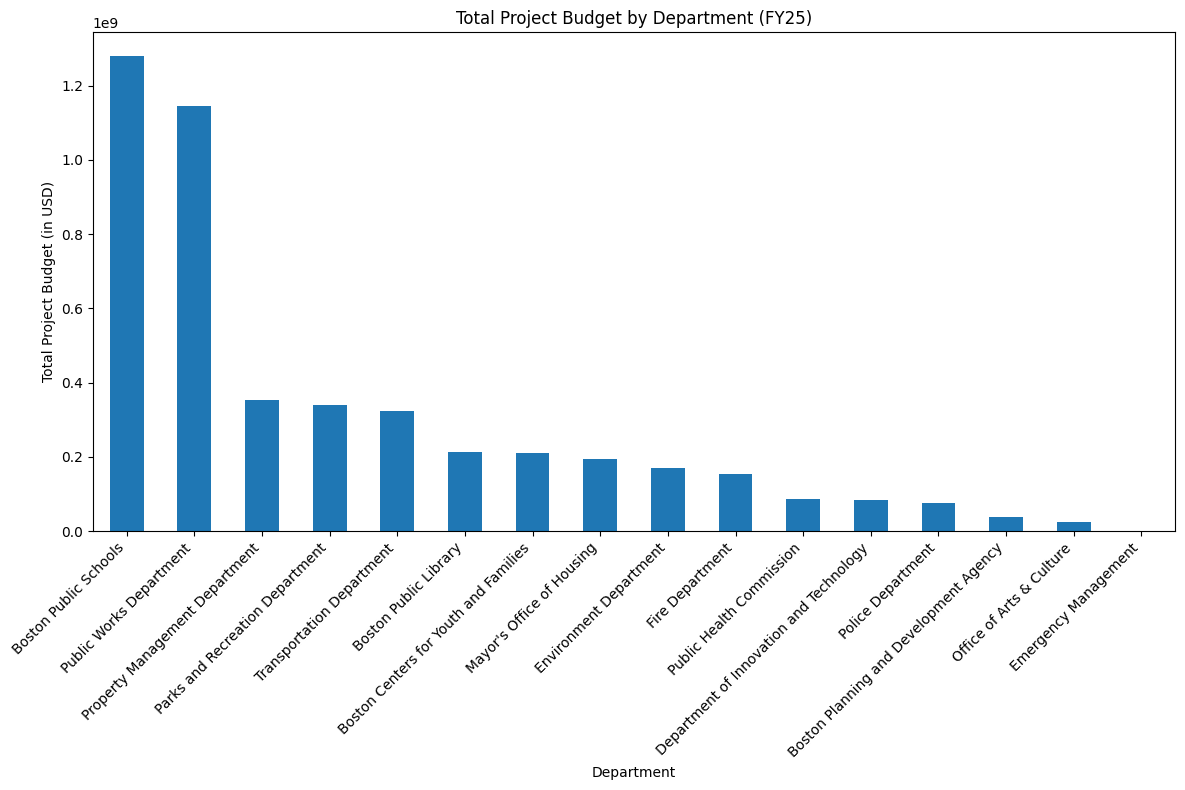

In [ ]:
# Visualization 1: Total Project Budget by Department
dept_total_budget = capital_budget.groupby("Department")["Total_Project_Budget"].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
dept_total_budget.plot(kind='bar')
plt.title("Total Project Budget by Department (FY25)")
plt.xlabel("Department")
plt.ylabel("Total Project Budget (in USD)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

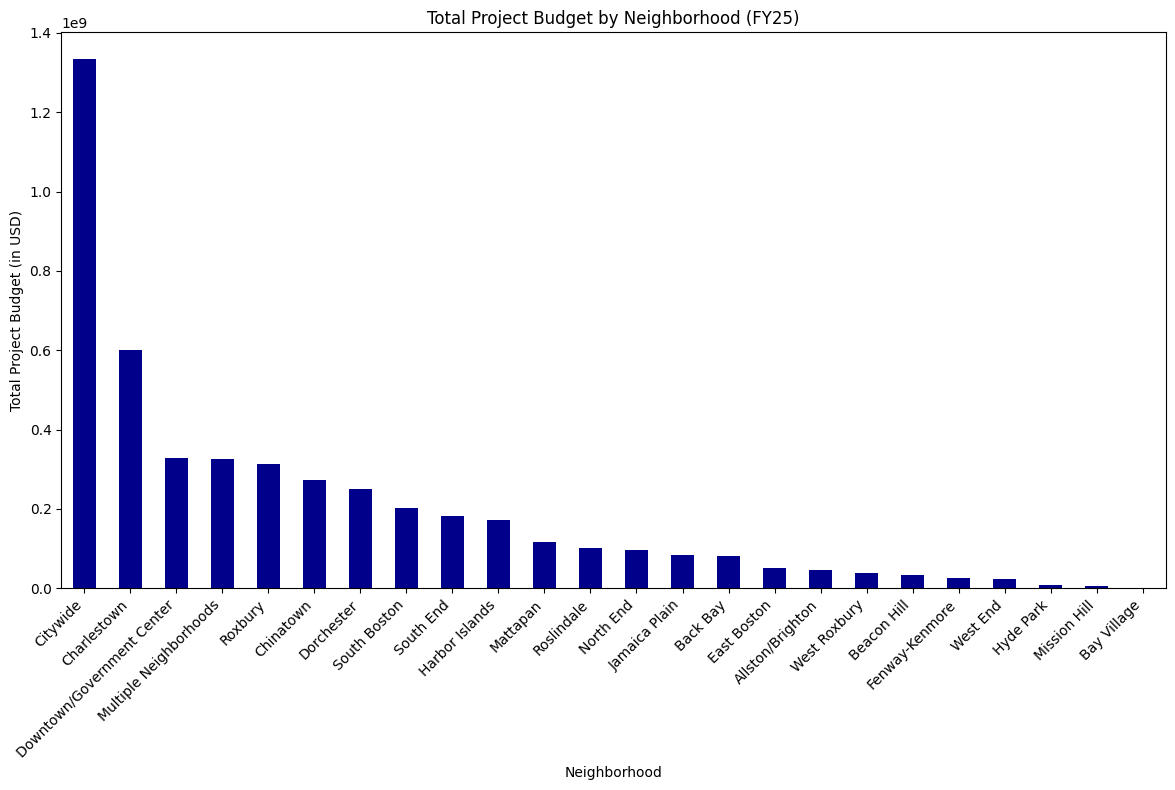

In [ ]:
# Visualization 2: Neighborhood-Specific Spending
neighborhood_budget = capital_budget.groupby("Neighborhood")["Total_Project_Budget"].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
neighborhood_budget.plot(kind='bar', color="darkblue")
plt.title("Total Project Budget by Neighborhood (FY25)")
plt.xlabel("Neighborhood")
plt.ylabel("Total Project Budget (in USD)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
unique_neighborhoods = capital_budget['Neighborhood'].unique()
unique_neighborhoods

array(['Citywide', 'Mission Hill', 'North End', 'Hyde Park', 'Roslindale',
       'Allston/Brighton', 'Dorchester', 'Charlestown', 'South Boston',
       'Downtown/Government Center', 'Harbor Islands', 'Roxbury',
       'Mattapan', 'Back Bay', 'Chinatown', 'South End', 'West End',
       'Jamaica Plain', 'Multiple Neighborhoods', 'Bay Village',
       'Fenway-Kenmore', 'West Roxbury', 'Beacon Hill', 'East Boston'],
      dtype=object)

In [ ]:
# Aggregating the total project budget by neighborhood
neighborhood_budget = capital_budget.groupby("Neighborhood")["Total_Project_Budget"].sum().reset_index()

# Merging the capital budget allocation with population data
merged_df = pd.merge(neighborhood_budget, population_df, on="Neighborhood", how="left")

# Calculating budget per capita (project allocation divided by population) for comparison
merged_df["Budget_Per_Capita"] = merged_df["Total_Project_Budget"] / merged_df["Population"]

# Sorting by Budget_Per_Capita for analysis
merged_df_sorted = merged_df.sort_values(by="Budget_Per_Capita", ascending=False)

# Display the merged DataFrame with Total Project Budget, Population, and Budget Per Capita for each neighborhood
print(merged_df_sorted)


                  Neighborhood  Total_Project_Budget  Population  \
5                    Chinatown             273772172      6211.0   
4                  Charlestown             599378839     19120.0   
17                   North End              95509959     10805.0   
21                   South End             181715235     30904.0   
19                     Roxbury             312782325     54533.0   
20                South Boston             203499965     37917.0   
14                    Mattapan             115606311     23840.0   
1                     Back Bay              81305000     18190.0   
3                  Beacon Hill              34410000      9336.0   
18                  Roslindale             102320000     29586.0   
22                    West End              24000000      7705.0   
13               Jamaica Plain              83940000     40015.0   
7                   Dorchester             249679178    122191.0   
23                West Roxbury              3843

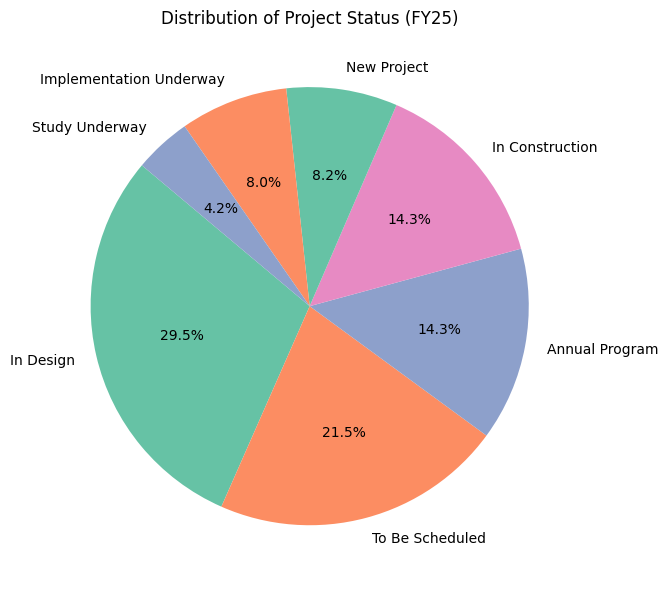

In [ ]:
# Visualization 3: Project Status Distribution
project_status_counts = capital_budget["Project_Status"].value_counts()

plt.figure(figsize=(10, 6))
project_status_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3'])
plt.title("Distribution of Project Status (FY25)")
plt.ylabel("")
plt.tight_layout()
plt.show()

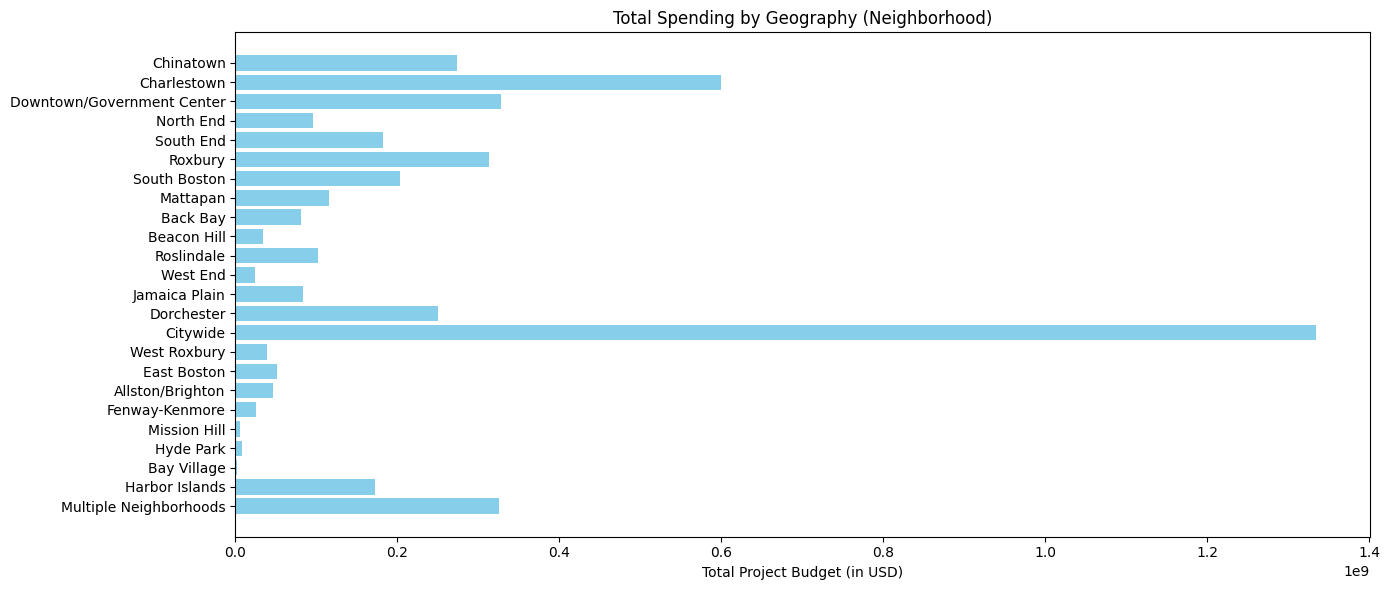

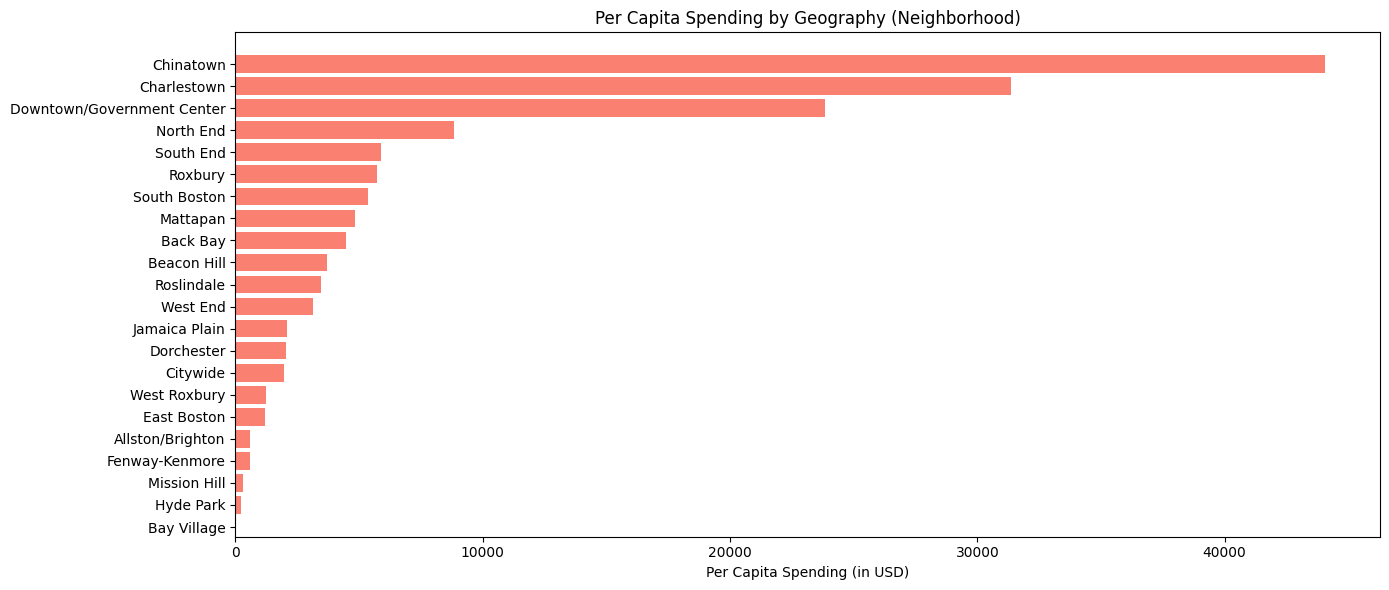

In [ ]:
# Visualization 1: Total Spending by Geography
plt.figure(figsize=(14, 6))
plt.barh(merged_df_sorted["Neighborhood"], merged_df_sorted["Total_Project_Budget"], color="skyblue")
plt.xlabel("Total Project Budget (in USD)")
plt.title("Total Spending by Geography (Neighborhood)")
plt.gca().invert_yaxis()  # Invert y-axis for readability
plt.tight_layout()
plt.show()

# Visualization 2: Per Capita Spending by Geography (Spending per resident in each area)
plt.figure(figsize=(14, 6))
plt.barh(merged_df_sorted["Neighborhood"], merged_df_sorted["Budget_Per_Capita"], color="salmon")
plt.xlabel("Per Capita Spending (in USD)")
plt.title("Per Capita Spending by Geography (Neighborhood)")
plt.gca().invert_yaxis()  # Invert y-axis for readability
plt.tight_layout()
plt.show()